# Prediksi Hujan di Denpasar

# Persiapan Data

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("openweatherdata-denpasar-1990-2020v0.1-simplified.csv")
data

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
0,0,25.82,25.82,25.82,1010.0,86,1.36,225,True
1,1,26.20,26.20,26.20,1011.0,84,2.09,247,True
2,2,26.45,26.45,26.45,1011.0,84,2.44,262,True
3,3,26.80,26.80,26.80,1011.0,82,2.29,271,True
4,4,27.04,27.04,27.04,1010.0,82,1.71,274,False
...,...,...,...,...,...,...,...,...,...
264919,19,27.00,27.00,27.00,1007.0,94,4.10,300,False
264920,20,27.00,27.00,27.00,1007.0,94,5.70,300,False
264921,21,28.00,28.00,28.00,1007.0,83,6.70,290,False
264922,22,28.00,28.00,28.00,1007.0,83,6.20,290,False


In [3]:
# 1. Ukuran dari data (instansi dan fitur)
# Instance
print("Total Instances: ", len(data.axes[0]))
# Feature
print("Total features: ", len(data.axes[1]))
# 2. Tipe dari setiap fitur
print(data.dtypes)
# 3. Banyak nilai unik dari fitur yang bertipe kategorikal
data1 = data.select_dtypes(exclude=['float64', 'int64'])
print(data1.nunique())
# 4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal
data2 = data.select_dtypes(exclude=['bool'])
print(data2.describe())

Total Instances:  264924
Total features:  9
hour            int64
temp          float64
temp_min      float64
temp_max      float64
pressure      float64
humidity        int64
wind_speed    float64
wind_deg        int64
raining          bool
dtype: object
raining    2
dtype: int64
                hour           temp       temp_min       temp_max  \
count  264924.000000  264924.000000  264924.000000  264924.000000   
mean       11.516861      27.273336      27.147962      27.397479   
std         6.921676       1.962571       1.973218       1.989172   
min         0.000000       3.000000       2.000000       3.000000   
25%         6.000000      25.940000      25.820000      26.000000   
50%        12.000000      27.000000      27.000000      27.000000   
75%        18.000000      28.600000      28.400000      29.000000   
max        23.000000      39.000000      39.000000      39.800000   

            pressure       humidity     wind_speed       wind_deg  
count  264924.000000  264924

<AxesSubplot: >

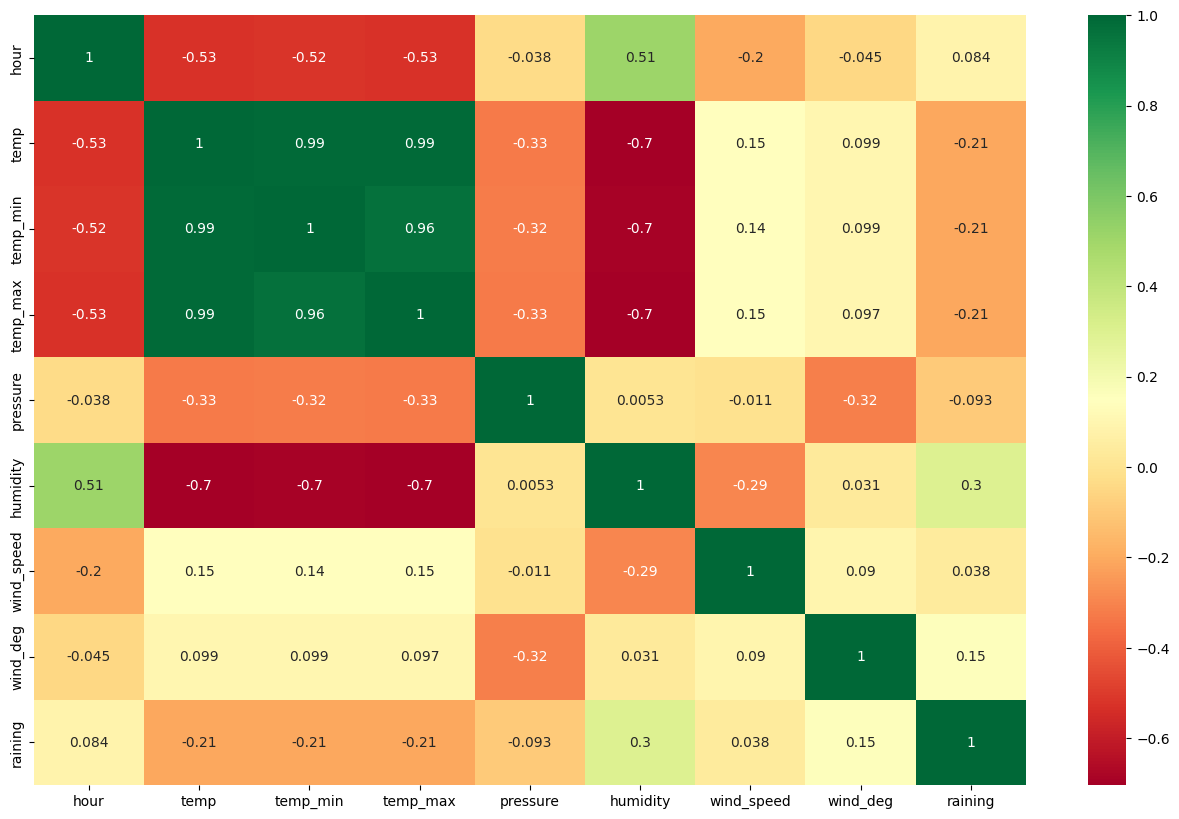

In [4]:
# Korelasi antar fitur
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

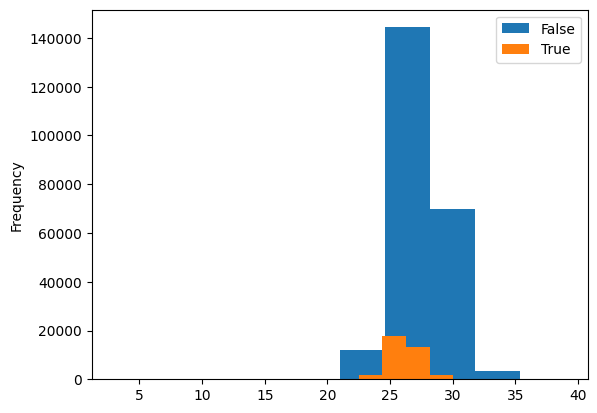

In [5]:
# Visualisasi distribusi fitur terhadap target fitur raining
data.groupby('raining')['temp'].plot.hist()
plt.legend()

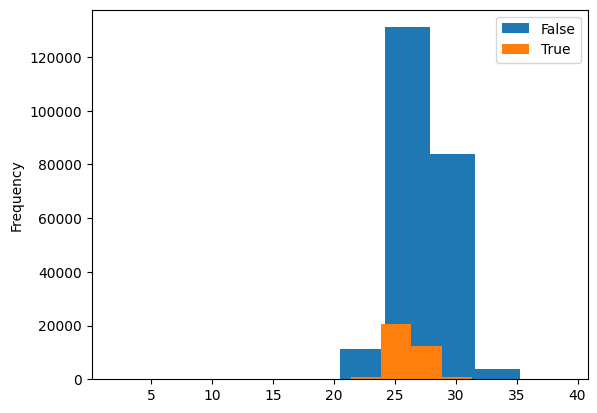

In [6]:
data.groupby('raining')['temp_min'].plot.hist()
plt.legend()

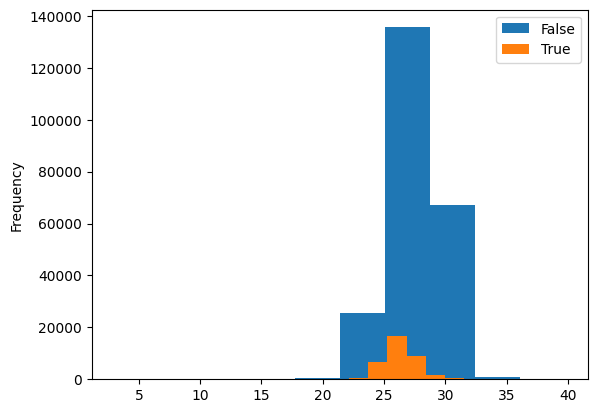

In [7]:
data.groupby('raining')['temp_max'].plot.hist()
plt.legend()

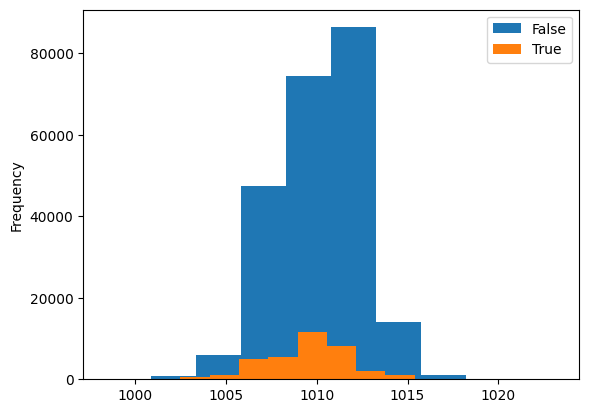

In [8]:
data.groupby('raining')['pressure'].plot.hist()
plt.legend()

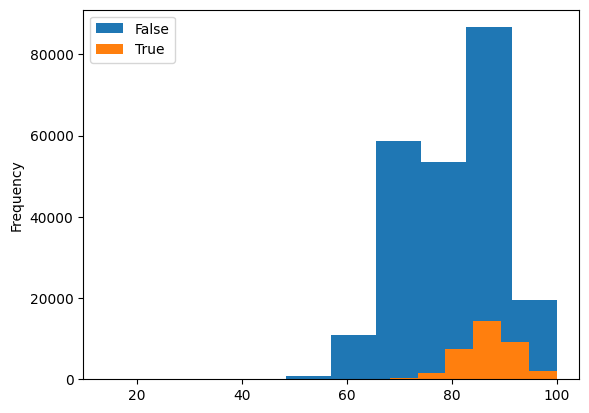

In [9]:
data.groupby('raining')['humidity'].plot.hist()
plt.legend()

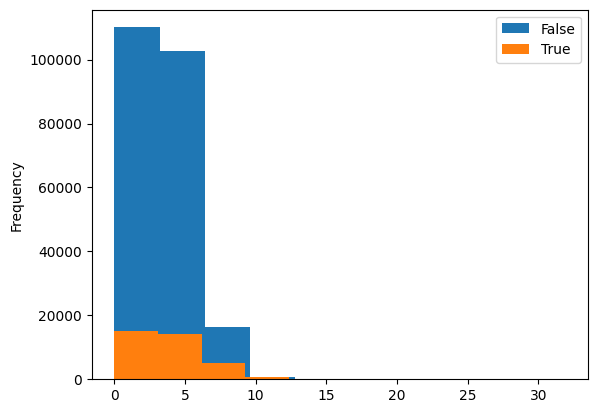

In [10]:
data.groupby('raining')['wind_speed'].plot.hist()
plt.legend()

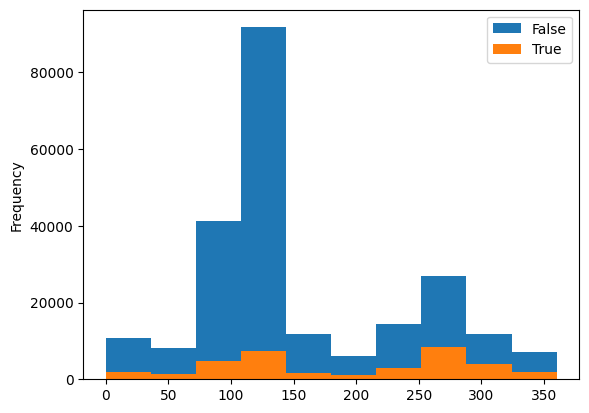

In [11]:
data.groupby('raining')['wind_deg'].plot.hist()
plt.legend()

In [12]:
X = data.drop(columns="raining")
y = data["raining"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

print(data)

        hour   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
0          0  25.82     25.82     25.82    1010.0        86        1.36   
1          1  26.20     26.20     26.20    1011.0        84        2.09   
2          2  26.45     26.45     26.45    1011.0        84        2.44   
3          3  26.80     26.80     26.80    1011.0        82        2.29   
4          4  27.04     27.04     27.04    1010.0        82        1.71   
...      ...    ...       ...       ...       ...       ...         ...   
264919    19  27.00     27.00     27.00    1007.0        94        4.10   
264920    20  27.00     27.00     27.00    1007.0        94        5.70   
264921    21  28.00     28.00     28.00    1007.0        83        6.70   
264922    22  28.00     28.00     28.00    1007.0        83        6.20   
264923    23  28.00     28.00     28.00    1008.0        83        5.70   

        wind_deg  raining  
0            225     True  
1            247     True  
2            26

# Bagian 1

## 1. Baseline dengan Logistic Regression

In [13]:
logisticreg = LogisticRegression()
logisticreg.fit(X_train, y_train)
y_pred = logisticreg.predict(X_test)
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
print("f1:",f1_score(y_test, y_pred, average='macro'))
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

f1: 0.5705755917667091
accuracy: 0.8728508068321224
precision: 0.5824675324675325
recall: 0.12830782434558718


## 2. Analisis Data

### 2.1. Duplicate Value

In [14]:
print(data.duplicated())
print("Jumlah duplicated value:", data.duplicated().sum())

0         False
1         False
2         False
3         False
4         False
          ...  
264919    False
264920    False
264921    False
264922    False
264923    False
Length: 264924, dtype: bool
Jumlah duplicated value: 7253


### 2.2. Missing Value

In [15]:
print(data.isnull())
print("Jumlah missing value setiap feature:", data.isnull().sum())

         hour   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
0       False  False     False     False     False     False       False   
1       False  False     False     False     False     False       False   
2       False  False     False     False     False     False       False   
3       False  False     False     False     False     False       False   
4       False  False     False     False     False     False       False   
...       ...    ...       ...       ...       ...       ...         ...   
264919  False  False     False     False     False     False       False   
264920  False  False     False     False     False     False       False   
264921  False  False     False     False     False     False       False   
264922  False  False     False     False     False     False       False   
264923  False  False     False     False     False     False       False   

        wind_deg  raining  
0          False    False  
1          False    False  
2  

### 2.3. Outlier

Jumlah Outlier Data Fitur Temp:
1458


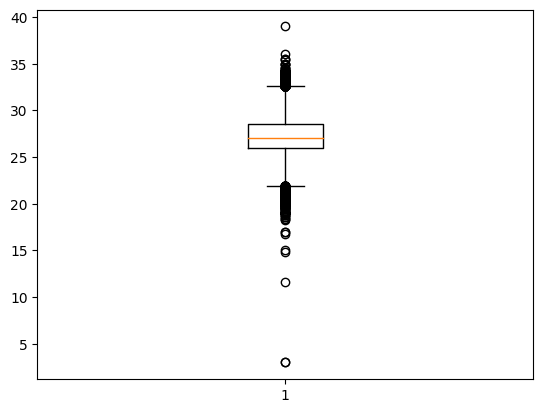

<Figure size 1000x700 with 0 Axes>

Jumlah Outlier Data Fitur Temp Min:
1716


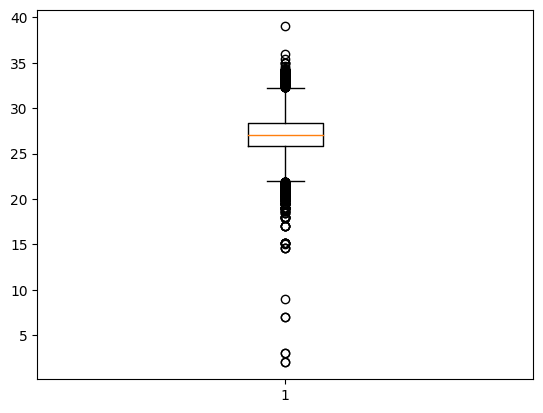

<Figure size 1000x700 with 0 Axes>

Jumlah Outlier Data Fitur Temp Max:
547


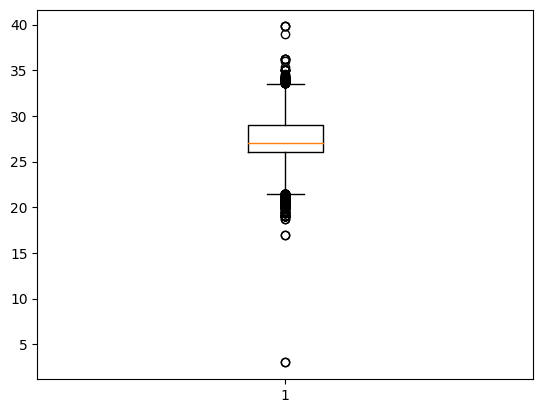

<Figure size 1000x700 with 0 Axes>

Jumlah Outlier Data Fitur Pressure:
1067


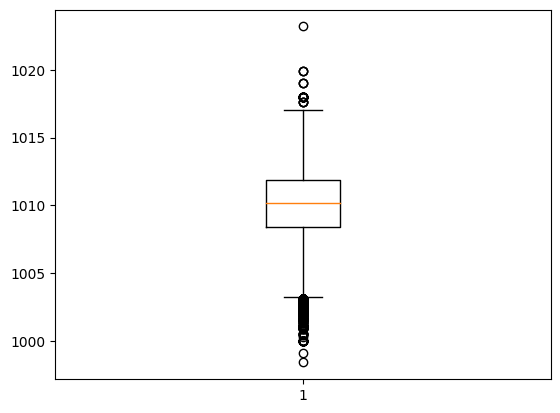

<Figure size 1000x700 with 0 Axes>

Jumlah Outlier Data Fitur Humidity:
231


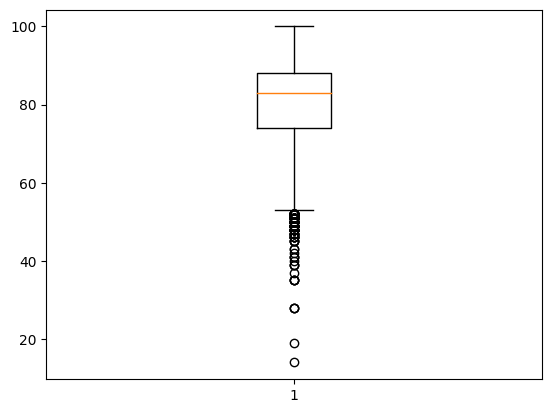

<Figure size 1000x700 with 0 Axes>

Jumlah Outlier Data Fitur Wind Speed:
3439


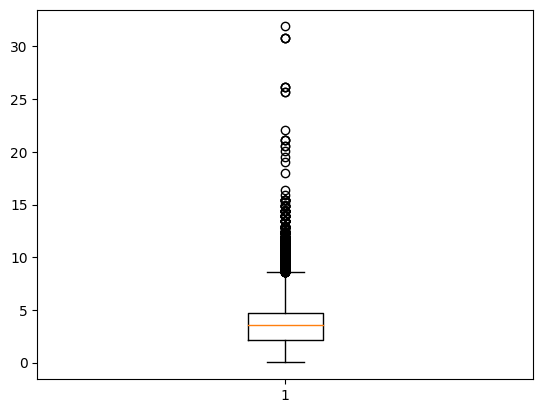

<Figure size 1000x700 with 0 Axes>

Jumlah Outlier Data Fitur Wind Deg:
3439


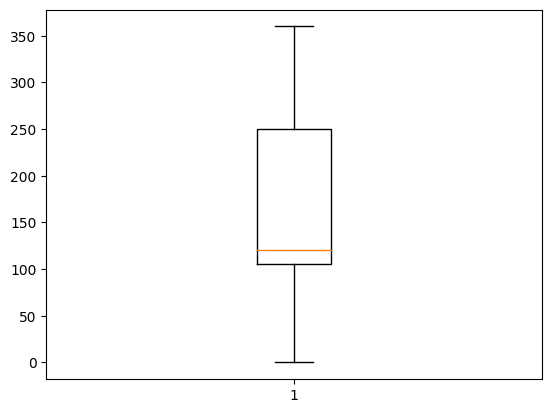

<Figure size 1000x700 with 0 Axes>

False    230023
True      34901
Name: raining, dtype: int64

In [16]:
#Temp
q1temp = np.quantile(data.temp, 0.25)
q3temp = np.quantile(data.temp, 0.75)

IQRtemp = q3temp - q1temp

lowertemp = (q1temp-1.5*IQRtemp)
uppertemp = (q3temp+1.5*IQRtemp)

print('Jumlah Outlier Data Fitur Temp:')
print(((data.temp<lowertemp) | (data.temp>uppertemp)).sum())
plt.boxplot(data['temp'])
fig = plt.figure(figsize =(10, 7))
plt.show()

#Temp Min
q1tempmin = np.quantile(data.temp_min, 0.25)
q3tempmin = np.quantile(data.temp_min, 0.75)

IQRtempmin = q3tempmin - q1tempmin

lowertempmin = (q1tempmin-1.5*IQRtempmin)
uppertempmin = (q3tempmin+1.5*IQRtempmin)

print('Jumlah Outlier Data Fitur Temp Min:')
print(((data.temp_min<lowertempmin) | (data.temp_min>uppertempmin)).sum())

plt.boxplot(data['temp_min'])
fig = plt.figure(figsize =(10, 7))
plt.show()

#Temp Max
q1tempmax = np.quantile(data.temp_max, 0.25)
q3tempmax = np.quantile(data.temp_max, 0.75)

IQRtempmax = q3tempmax - q1tempmax

lowertempmax = (q1tempmax-1.5*IQRtempmax)
uppertempmax = (q3tempmax+1.5*IQRtempmax)

print('Jumlah Outlier Data Fitur Temp Max:')
print(((data.temp_max<lowertempmax) | (data.temp_max>uppertempmax)).sum())

plt.boxplot(data['temp_max'])
fig = plt.figure(figsize =(10, 7))
plt.show()

#Pressure
q1 = np.quantile(data.pressure, 0.25)
q3 = np.quantile(data.pressure, 0.75)

IQR = q3 - q1

lower = (q1-1.5*IQR)
upper = (q3+1.5*IQR)

print('Jumlah Outlier Data Fitur Pressure:')
print(((data.pressure<lower) | (data.pressure>upper)).sum())

plt.boxplot(data['pressure'])
fig = plt.figure(figsize =(10, 7))
plt.show()

#Humidity
q1humidity = np.quantile(data.humidity, 0.25)
q3humidity = np.quantile(data.humidity, 0.75)

IQRhumidity = q3humidity - q1humidity

lowerhumidity = (q1humidity-1.5*IQRhumidity)
upperhumidity = (q3humidity+1.5*IQRhumidity)

print('Jumlah Outlier Data Fitur Humidity:')
print(((data.humidity<lowerhumidity) | (data.humidity>upperhumidity)).sum())

plt.boxplot(data['humidity'])
fig = plt.figure(figsize =(10, 7))
plt.show()

#Wind Speed
q1windspeed = np.quantile(data.wind_speed, 0.25)
q3windspeed = np.quantile(data.wind_speed, 0.75)

IQRwindspeed = q3windspeed - q1windspeed

lowerwindspeed = (q1windspeed-1.5*IQRwindspeed)
upperwindspeed = (q3windspeed+1.5*IQRwindspeed)

print('Jumlah Outlier Data Fitur Wind Speed:')
print(((data.wind_speed<lowerwindspeed) | (data.wind_speed>upperwindspeed)).sum())

plt.boxplot(data['wind_speed'])
fig = plt.figure(figsize =(10, 7))
plt.show()

# Wind Deg
q1winddeg = np.quantile(data.wind_speed, 0.25)
q3winddeg = np.quantile(data.wind_speed, 0.75)

IQRwinddeg = q3winddeg - q1winddeg

lowerwinddeg = (q1winddeg-1.5*IQRwinddeg)
upperwinddeg = (q3winddeg+1.5*IQRwinddeg)

print('Jumlah Outlier Data Fitur Wind Deg:')
print(((data.wind_speed<lowerwinddeg) | (data.wind_speed>upperwinddeg)).sum())

plt.boxplot(data['wind_deg'])
fig = plt.figure(figsize =(10, 7))
plt.show()

#Rain
data['raining'].value_counts()
# Rain tidak punya data outlier karena hanya terdapat dua value di dalam datanya

### 2.4. Balance of Data

In [17]:
data['raining'].value_counts().to_frame().T

,False,True
raining,230023,34901


Berdasarkan hasil di atas, dapat disimpulkan bahwa dataset bersifat imbalance.

## 3. Rencana Penanganan pada Poin 2

### 3.1. Penanganan nilai duplikat

Penanganan nilai duplikat dilakukan dengan menghapus rows yang memiliki nilai duplikat. Hal ini dilakukan untuk menjaga data tetap clean. Data duplikat dapat merusak split data train, test, dan validasi. Hal ini dapat menyebabkan hasil estimasi yang bias.

In [18]:
display(data.drop_duplicates())

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
0,0,25.82,25.82,25.82,1010.0,86,1.36,225,True
1,1,26.20,26.20,26.20,1011.0,84,2.09,247,True
2,2,26.45,26.45,26.45,1011.0,84,2.44,262,True
3,3,26.80,26.80,26.80,1011.0,82,2.29,271,True
4,4,27.04,27.04,27.04,1010.0,82,1.71,274,False
...,...,...,...,...,...,...,...,...,...
264919,19,27.00,27.00,27.00,1007.0,94,4.10,300,False
264920,20,27.00,27.00,27.00,1007.0,94,5.70,300,False
264921,21,28.00,28.00,28.00,1007.0,83,6.70,290,False
264922,22,28.00,28.00,28.00,1007.0,83,6.20,290,False


### 3.2. Penanganan nilai hilang

Untuk data dengan tipe numeric, nilai hilang diisi dengan median dari fiturnya karena dataset memiliki nilai pencilan yang belum dihandling, lebih baik menggunakan nilai median karena hasilnya yang tidak sebias mean. Sedangkan untuk categorical featue, nilai hilang diisi dengan modus dari fitur tersebut. 

In [19]:
data1 = data.select_dtypes(exclude='bool')
data1.fillna(data1.median(), inplace=True)
data2 = data['raining']
data2.fillna(data2.mode(), inplace=True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### 3.3. Penanganan Nilai Pencilan

Penanganan nilai pencilan dilakukan dengan memanfaatkan metode winsorize. Hal ini dipilih karena jika nilai pencilan dihapus dapat menyebabkan sampling bias. Sedangkan dengan winsorizing, nilai outliers atas akan diganti dengan 95% percentile value dan nilai pencilan bawah diganti dengan 5% percentile value yang membuat data lebih clean untuk di-training.

In [20]:
# referensi: https://www.datasciencesmachinelearning.com/2018/11/handling-outliers-in-python.html

import scipy.stats
import numpy as np
scipy.stats.mstats.winsorize(data.all(), limits = 0.05)

masked_array(data=[False,  True,  True,  True,  True,  True,  True, False,
                   False],
             mask=False,
       fill_value=True)

### 3.4. Penanganan Imbalanced Dataset

In [21]:
%pip install imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


3.4.1. Oversampling pada kelas minoritas pada data latih

Penanganan imbalanced dataset dilakukan dengan melakukan oversampling terhadap data minoritas dan menghasilkan akurasi yang lebih tinggi daripada menggunakan undersampling. Pemilihan metoden oversampling dilakukan karena dataset tidak sangat besar (at least million of rows) dan oversampling tidak menyebabkan information loss.

In [22]:
from sklearn.metrics import classification_report

oversampling = RandomOverSampler(sampling_strategy="not majority", random_state=42)
oversampling_x_train, oversampling_y_train = oversampling.fit_resample(X_train, y_train)
logisticreg.fit(oversampling_x_train, oversampling_y_train)
raining_pred = logisticreg.predict(X_test)


print(classification_report(y_test, raining_pred))
print('accuracy:',accuracy_score(y_test,  raining_pred))
print('precision:', precision_score(y_test, raining_pred))
print('recall:', recall_score(y_test, raining_pred))
print('f1:', f1_score(y_test, raining_pred))

              precision    recall  f1-score   support

       False       0.95      0.71      0.81     45994
        True       0.28      0.76      0.41      6991

    accuracy                           0.72     52985
   macro avg       0.62      0.73      0.61     52985
weighted avg       0.86      0.72      0.76     52985

accuracy: 0.7154288949702746
precision: 0.28336458612376103
recall: 0.7565441281647833
f1: 0.4123012160898035


3.4.2. Undersampling pada kelas mayoritas pada data latih

In [23]:
from sklearn.metrics import classification_report

undersampling = RandomUnderSampler(sampling_strategy="not minority", random_state=42)
undersampling_x_train, undersampling_y_train = undersampling.fit_resample(X_train, y_train)
logisticreg.fit(undersampling_x_train, undersampling_y_train)
raining_pred = logisticreg.predict(X_test)


print(classification_report(y_test, raining_pred))
print('accuracy:',accuracy_score(y_test,  raining_pred))
print('precision:', precision_score(y_test, raining_pred))
print('recall:', recall_score(y_test, raining_pred))
print('f1:', f1_score(y_test, raining_pred))

              precision    recall  f1-score   support

       False       0.95      0.71      0.81     45994
        True       0.28      0.76      0.41      6991

    accuracy                           0.71     52985
   macro avg       0.62      0.73      0.61     52985
weighted avg       0.86      0.71      0.76     52985

accuracy: 0.7149570633198075
precision: 0.2831247994866859
recall: 0.7574023744814762
f1: 0.41217452224341256


## 4. Teknik Encoding yang Digunakan Terhadap Data

In [24]:
from sklearn.preprocessing import LabelEncoder
# Transformasi data raining
le = LabelEncoder()
data['raining'] = le.fit_transform(data['raining'])

Dalam hal ini, digunakan label encoder untuk data raining dengan menggunakan metode le.fit_transform(). Hal ini bertujuan untuk melakukan pengubahan atau mapping dari nilai data raining yang semula true atau false menjadi nilai numerikal 1 atau 0.

## 5. Desain Eksperimen

### 5.1. Tujuan Eksperimen

Tujuan dari eksperimen yang dilakukan adalah untuk mencari metode terbaik dengan benar

### 5.2. Variabel Dependen dan Independen

5.2.1. Variabel Dependen

Dalam hal ini variabel dependen yang digunakan adalah data raining karena data raining merupakan data yang dipengaruhi dan akan diteliti.

In [25]:
y = data['raining']

5.2.2. Variabel Independen

Dalam hal ini variabel independen yang digunakan adalah data lain selain data raining karena data-data tersebut menjadi data yang memengaruhi nilai dari data raining nantinya.

In [26]:
X = data.drop(columns=['raining'])

### 5.3. Strategi Eksperimen

Dalam hal ini, dirancang suatu strategi eksperimen menggunakan algoritma SVM dan ID3. Hal ini didasarkan oleh hasil encoding yang diperoleh, yakni data raining hanya memiliki dua value, yakni true (1) dan false (0). Maka dari itu, eksperimen dilakukan dengan memilih algoritma classification mengingat hasil akhir yang diperlukan hanya dua kelas saja, yakni true atau false. ID3 dipilih karena algoritma tersebut memiliki akurasi yang baik, sedangkan SVM memiliki kelebihan untuk melakukan handling terhadap data yang memerlukan dimensi tinggi.

### 5.4. Skema Validasi

Digunakan skema validasi berupa cross validation dengan nilai cv = 5 dengan alasan validasi tersebut cocok untuk strategi eksperimen menggunakan SVM.

# Bagian 2

## 6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5

### 6.1. Eksperimen menggunakan SVM

In [27]:
# Split data training dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [28]:
# SVM Algorithm
svm_classifier = svm.SVC(probability=True, max_iter=100) 
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average=None)}')
print(f'recall: {recall_score(y_test, y_pred, average=None)}')
print(f'f1: {f1_score(y_test, y_pred, average=None)}')

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
              precision    recall  f1-score   support

           0       0.78      0.28      0.42     45994
           1       0.09      0.47      0.15      6991

    accuracy                           0.31     52985
   macro avg       0.44      0.38      0.28     52985
weighted avg       0.69      0.31      0.38     52985

accuracy: 0.3088043785977163
precision: [0.78035063 0.09153066]
recall: [0.28355873 0.4748963 ]
f1: [0.41596632 0.15347988]


In [29]:
# Validation Schema Using Cross Validation
print(f'cross validation = {cross_val_score(svm_classifier, X_train, y_train.values.ravel(), cv=5)}')

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: Conv

### 6.2. Eksperimen menggunakan ID3

Algoritma ID3 dinilai memiliki akurasi lebih tinggi untuk memprediksi hujan di kota Denpasar. Hal ini dinilai karena algoritma ID3 memiliki keunggulan dalam melakukan klasifikasi. ID3 menggunakan pendekatan greedy di dalam pembangunan decision tree dengan memilih atribut terbaik yang menghasilkan nilai information gain  maksimum atau entropy minimum.

Berikut merupakan eksperimen yang dilakukan dengan menggunakan algoritma ID3.

In [30]:
# ID3 Algorithm
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average=None)}')
print(f'recall: {recall_score(y_test, y_pred, average=None)}')
print(f'f1: {f1_score(y_test, y_pred, average=None)}')

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     45994
           1       0.45      0.46      0.46      6991

    accuracy                           0.86     52985
   macro avg       0.69      0.69      0.69     52985
weighted avg       0.86      0.86      0.86     52985

accuracy: 0.8559592337453996
precision: [0.91821472 0.45499228]
recall: [0.91561943 0.46345301]
f1: [0.91691524 0.45918367]


In [31]:
# Validation Schema Using Cross Validation
print(f'cross validation = {cross_val_score(decision_tree, X_train, y_train.values.ravel(), cv=5)}')

cross validation = [0.85963008 0.85557233 0.8553836  0.85573747 0.85429495]


### 6.3. Eksperimen Menggunakan Naive Bayes (Tambahan)

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average=None)}')
print(f'recall: {recall_score(y_test, y_pred, average=None)}')
print(f'f1: {f1_score(y_test, y_pred, average=None)}')

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     45994
           1       0.31      0.65      0.41      6991

    accuracy                           0.76     52985
   macro avg       0.62      0.71      0.63     52985
weighted avg       0.85      0.76      0.79     52985

accuracy: 0.7594790978578843
precision: [0.93523221 0.30547102]
recall: [0.77671001 0.64611644]
f1: [0.8486317 0.4148223]


In [33]:
# Validation Schema Using Cross Validation
print(f'cross validation = {cross_val_score(decision_tree, X_train, y_train.values.ravel(), cv=5)}')

cross validation = [0.85908748 0.85528923 0.8551005  0.85557233 0.85446009]


## 7. Analisis Karakteristik Kondisi Hujan

7. 1. SVM

Algoritma SVM memiliki nilai akurasi yang kecil dengan nilai akurasi hanya 30.88%, algoritma ini dinilai tidak baik untuk melakukan prediksi kondisi hujan karena hasilnya jauh jika dibandingkan nilai testnya. Bahkan, nilai kesalahan saat melakukan prediksinya pun lebih besar. Hal ini juga dapat dilihat dengan nilai yang kecil ketika dilakukan pengujian menggunakan cross validation. Algoritma ini tidak direkomendasikan untuk menyelesaikan persoalan ini.

7. 2. ID3

Ditinjau dari segi akurasi, algoritma ID3 dinilai memiliki akurasi yang paling tinggi dibandingkan algoritma lainnya. Berdasarkan nilai akurasi tersebut, diperoleh bahwa persentase kesesuaian antara prediksi dan tes pada raining adalah 85.57%. Selain itu, berdasarkan nilai precision dan recall, hujan diprediksi akan turun (true) mengingat nilai true positive pada data tersebut lebih besar dari 0.5.

7. 3. Naive Bayes

Algoritma ini memiliki nilai akurasi yang cukup besar, yakni diperoleh nilai persentase raining bernilai 75.94% yang menggambarkan kesesuaian antara data prediksi dan data test untuk algoritma naive bayes. Selain itu, berdasarkan nilai precision dan recall, hujan diprediksi akan turun (true) mengingat nilai true positive pada data tersebut lebih besar dari 0.5.

precision: Tp/(Tp+Fp) = 0.94; Tp = 0.94 tp + 0.94 fp; 0.06 Tp = 0.94 Fp =>Tp : Fp = 47 : 3

recall: Tp/(Tp+Fn) = 0.78; Tp = 0.78 Tp + 0.78 Fn; 0.22 Tp = 0.78 Fn => Tp : Fn = 39 : 11

# Kesimpulan

Dilakukan suatu eksperimen dengan variabel dependen berupa nilai data raining pada dataset Denpasar Weather Data. Dari beberapa eksperimen yang dilakukan untuk memprediksi hujan, algoritma ID3 memiliki akurasi yang paling tinggi dibanding yang lainnya.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cbfe1043-7f73-4957-a93f-f4e6ed329653' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>